# Proyecto análisis de conversación de mensajería

In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from datetime import *

def extract_time(date):
    return datetime.strptime(date, "%Y-%m-%dT%H:%M:%S")

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [16]:
import pandas as pd

df = pd.read_json("../data/result.json")

df = pd.DataFrame([msg for msg in df["messages"] if msg["type"] == "message"])

df = df.filter(items = ['id','type', 'date', 'from', 'from_id', 'text'])

df.sample(5)

,id,type,date,from,from_id,text
101,110,message,2016-10-06T10:00:36,Diego Córdoba (at @juncotic),user8853399,ese es el receptor
2514,2570,message,2020-05-27T12:27:46,Diego Córdoba (at @juncotic),user8853399,"sii! fijate lo de los | duplicados, Esteban te..."
1424,1471,message,2020-04-08T13:25:25,Seba Fernández,user1005951679,Los toma como una sola orden? por eso los niet...
1574,1622,message,2020-04-15T10:36:57,Matias Ruiz,user857392417,Para nada
2732,2790,message,2020-06-04T20:50:26,Diego Córdoba (at @juncotic),user8853399,[Gente! Me han estado llegando solicitudes de ...


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3376 non-null   int64 
 1   type     3376 non-null   object
 2   date     3376 non-null   object
 3   from     3185 non-null   object
 4   from_id  3376 non-null   object
 5   text     3376 non-null   object
dtypes: int64(1), object(5)
memory usage: 158.4+ KB


# Campos del DataFrame
- id: Identificador del mensaje.
- type: Tipo de mensaje. Puede ser, mensaje, aviso, anuncio, etc. Hemos filtrado solo aquellos que tienen como tipo 'mensaje'.
- date: Fecha del mensaje.
- from: Usuario que envio el mensaje.
- from_id: Identificador del usuario que envio el mensaje.
- text: Contenido del mensaje. Si tiene link, es un listado que contiene el contenido del mensaje y al link que redirije.

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [5]:
import numpy as np

missing = []
for column in df.columns:
    data = {}
    data['column'] = column
    data['type'] = df[column].dtypes
    data['percentage'] = np.mean(df[column].isnull())*100
    data['quantity'] = np.sum(df[column].isnull())
    missing.append(data)

missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,id,int64,0.000000,0
1,type,object,0.000000,0
2,date,object,0.000000,0
3,from,object,5.657583,191
4,from_id,object,0.000000,0
5,text,object,0.000000,0


<AxesSubplot: >

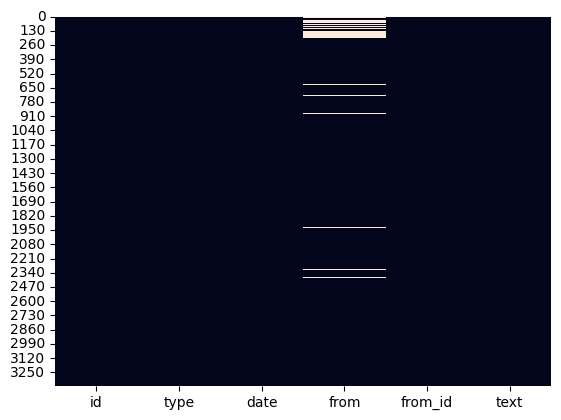

In [6]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

In [7]:
df_clear = df[~df['from'].isnull()]

df_clear

,id,type,date,from,from_id,text
0,2,message,2016-08-18T12:32:42,Diego Córdoba (at @juncotic),user8853399,"[Si quieren invitar al resto pasen este link, ..."
3,10,message,2016-08-18T18:49:13,Diego Córdoba (at @juncotic),user8853399,"Gente, a los que me pasaron su mail les di el ..."
4,11,message,2016-08-18T18:49:59,Diego Córdoba (at @juncotic),user8853399,si alguien mas quiere me pasa el mail y los vo...
6,13,message,2016-08-18T18:50:10,Diego Córdoba (at @juncotic),user8853399,👍🏼
7,14,message,2016-08-18T18:50:36,Diego Córdoba (at @juncotic),user8853399,"es un curso introductorio, no es la gran cosa,..."
...,...,...,...,...,...,...
3371,3464,message,2021-09-08T17:05:26,Diego Córdoba (at @juncotic),user8853399,Estimados! Acabo de publicar los videos de la ...
3372,3465,message,2021-09-08T17:06:03,Julián,user784162152,Joya profe!
3373,3466,message,2021-09-08T17:06:30,Diego Córdoba (at @juncotic),user8853399,"[Además, hoy durante la clase definimos la fec..."
3374,3468,message,2021-09-08T17:28:53,Tato Beato,user1077377295,👌👌👌


Borramos las lineas vacias ya que son mensajes de personas que han salido o han sido expulsados del grupo y no nos interesa ya que son mensajes enviados por alguien inexistente, por lo tanto, son irrelevantes.

In [8]:
missing = []
for column in df_clear.columns:
    data = {}
    data['column'] = column
    data['type'] = df[column].dtypes
    data['percentage'] = np.mean(df_clear[column].isnull())*100
    data['quantity'] = np.sum(df_clear[column].isnull())
    missing.append(data)

missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,id,int64,0.0,0
1,type,object,0.0,0
2,date,object,0.0,0
3,from,object,0.0,0
4,from_id,object,0.0,0
5,text,object,0.0,0


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [9]:
df_clear[['type', 'from']].describe()

,type,from
count,3185,3185
unique,1,37
top,message,Diego Córdoba (at @juncotic)
freq,3185,1593


Se tiene en cuenta que hay 3185 mensajes, de los cuales, el usuario que escribrio con mas frecuencia es Diego Córdoba entre otros 37 usuarios.

In [10]:
Q1 = df_clear.quantile(0.25)
Q3 = df_clear.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id    1646.0
dtype: float64


/tmp/ipykernel_13545/470076229.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_clear.quantile(0.25)
/tmp/ipykernel_13545/470076229.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_clear.quantile(0.75)


Con el IQR podemos observar la tendencia central de los datos

In [11]:
# Rangos normales de datos
lower_rank = Q1 - 1.5 * IQR
higher_rank = Q3 + 1.5 * IQR

print(f"""
Rango Inferior:
{lower_rank}

Rango Superior:
{higher_rank}
""")


Rango Inferior:
id   -1480.0
dtype: float64

Rango Superior:
id    5104.0
dtype: float64



In [12]:
# Mostrar si un valor es atipico o no
df_outliers = (df_clear < lower_rank) | (df_clear > higher_rank)
df_outliers

/tmp/ipykernel_13545/3629132285.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df_clear < lower_rank) | (df_clear > higher_rank)


,date,from,from_id,id,text,type
0,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
...,...,...,...,...,...,...
3371,False,False,False,False,False,False
3372,False,False,False,False,False,False
3373,False,False,False,False,False,False
3374,False,False,False,False,False,False


<AxesSubplot: >

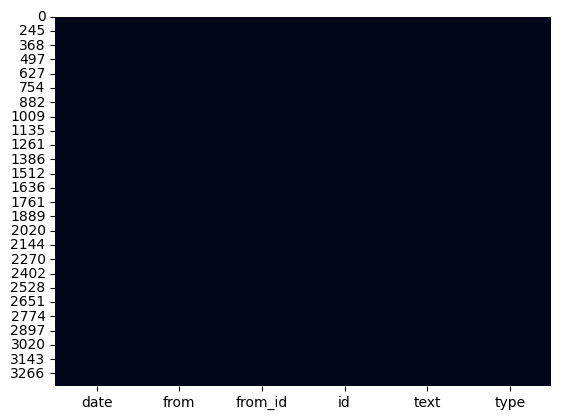

In [13]:
sns.heatmap(df_outliers, cbar=False)

<AxesSubplot: >

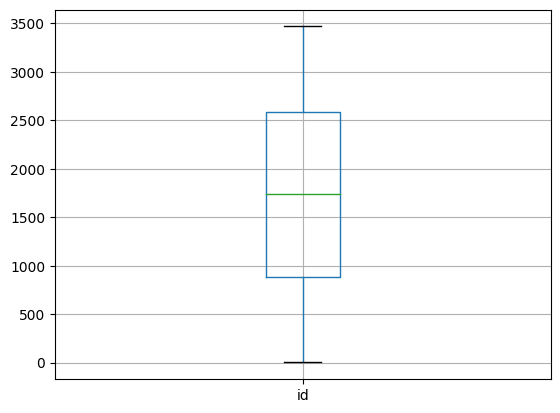

In [14]:
df.boxplot()

- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

No hay valores atípicos en la muestra recolectada.